In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score


In [5]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<Axes: >

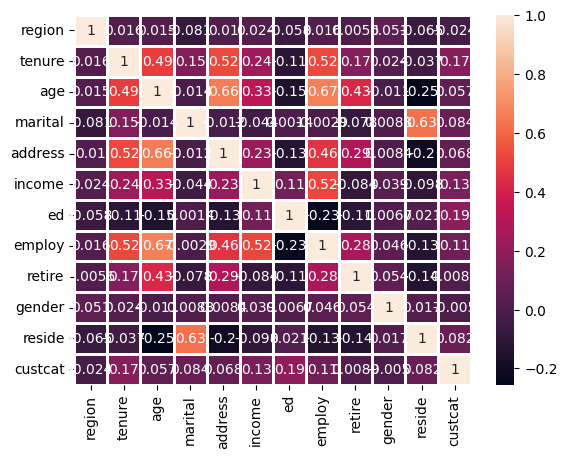

In [12]:
corr = df.corr()
sns.heatmap(corr,annot = True,linewidths=1)

In [17]:
corr_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending = False)
corr_values

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

In [52]:
y = df['custcat']
X = df.drop(['custcat'],axis =1)
X_norm = normalize(X,norm = 'l1')
# X_norm = StandardScaler().fit_transform(X)
X_norm

array([[0.01388889, 0.09027778, 0.30555556, ..., 0.        , 0.        ,
        0.01388889],
       [0.01449275, 0.0531401 , 0.15942029, ..., 0.        , 0.        ,
        0.02898551],
       [0.01010101, 0.22895623, 0.17508418, ..., 0.        , 0.003367  ,
        0.00673401],
       ...,
       [0.00260191, 0.05810928, 0.05117086, ..., 0.        , 0.0008673 ,
        0.0008673 ],
       [0.01185771, 0.27667984, 0.19367589, ..., 0.        , 0.00395257,
        0.00395257],
       [0.02054795, 0.34246575, 0.24657534, ..., 0.        , 0.00684932,
        0.02054795]])

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=69,test_size=0.2)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
model = knn.fit(X_train,y_train)
pred_val = model.predict(X_test)
acc = accuracy_score(y_test,pred_val)
print(acc)

0.32
